<a href="https://colab.research.google.com/github/maximnedelco/ml-product-categorization/blob/main/Notebook/Product_Category_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title:** ML-product-categorization
## **Author:** Nedelco Maxim
Main goal:
Machine learning project for predicting product categories based on product titles.


#Importarea librariilor

In [51]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

## Load dataset

In [52]:
url = "https://github.com/maximnedelco/ml-product-categorization/raw/refs/heads/main/data/IMLP4_TASK_03-products.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.lower().str.strip()
df.head(10)


,product id,product title,merchant id,category label,_product code,number_of_views,merchant rating,listing date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023
5,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,Mobile Phones,SB-2202-CH,3444.0,1.6,11/27/2022
6,7,apple iphone 8 plus 64 gb space grey,7,Mobile Phones,QJ-3229-QP,3171.0,1.2,3/29/2022
7,8,apple iphone 8 plus 64gb space grey,8,Mobile Phones,ES-1396-OR,2919.0,4.5,5/21/2024
8,9,apple iphone 8 plus 64gb space grey,9,Mobile Phones,VU-2032-FY,130.0,3.4,5/11/2022
9,10,apple iphone 8 plus 64gb space grey,10,Mobile Phones,WI-6394-GG,1685.0,3.8,2/9/2024


## Data exploration


In [53]:
df.info()
df.isna().sum()
print(df['category label'].value_counts())
df.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product id       35311 non-null  int64  
 1   product title    35139 non-null  object 
 2   merchant id      35311 non-null  int64  
 3   category label   35267 non-null  object 
 4   _product code    35216 non-null  object 
 5   number_of_views  35297 non-null  float64
 6   merchant rating  35141 non-null  float64
 7   listing date     35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB
category label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64


,0
product id,int64
product title,object
merchant id,int64
category label,object
_product code,object
number_of_views,float64
merchant rating,float64
listing date,object


#Data cleaning


In [54]:
category_map = {
    'Fridges': 'Fridge Freezers',
    'fridge': 'Fridge Freezers',
    'Fridge Freezers': 'Fridge Freezers',
    'Mobile Phone': 'Mobile Phones',
    'Mobile Phones': 'Mobile Phones',
    'CPU': 'CPUs',
    'CPUs': 'CPUs',
    'TVs': 'TVs',
    'Freezers': 'Freezers',
    'Washing Machines': 'Washing Machines',
    'Dishwashers': 'Dishwashers',
    'Digital Cameras': 'Digital Cameras',
    'Microwaves': 'Microwaves'
}
df["category"] = df['category label'].map(category_map).fillna(df['category label'])

df.drop_duplicates()
df["product title"] = df["product title"].str.strip()
df["category"] = df["category"].astype("category")
df["product title"] = df["product title"].astype("string")
df = df[["product title", "category"]]


df.dropna(subset = ["product title", "category"],inplace = True)




print(df.head())
print(df.dtypes)


                                       product title       category
0                    apple iphone 8 plus 64gb silver  Mobile Phones
1                apple iphone 8 plus 64 gb spacegrau  Mobile Phones
2  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...  Mobile Phones
3                apple iphone 8 plus 64gb space grey  Mobile Phones
4  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...  Mobile Phones
product title    string[python]
category               category
dtype: object


#Train/Test split

In [55]:
X = df['product title']
y = df['category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Vectorization (TF-IDF)


In [56]:
# Transform text into numerical vectors
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## Train models

In [57]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Linear SVM": LinearSVC()
}

results = {}


for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print(classification_report(y_test, preds))
    print()



--- Logistic Regression ---
Accuracy: 0.9631054131054131
                  precision    recall  f1-score   support

            CPUs       1.00      1.00      1.00       740
 Digital Cameras       0.99      0.99      0.99       535
     Dishwashers       0.96      0.92      0.94       684
        Freezers       0.99      0.85      0.92       422
 Fridge Freezers       0.91      0.98      0.94      1818
      Microwaves       0.99      0.94      0.97       464
   Mobile Phones       0.99      0.98      0.99       812
             TVs       0.97      0.98      0.98       724
Washing Machines       0.98      0.93      0.96       821

        accuracy                           0.96      7020
       macro avg       0.98      0.95      0.96      7020
    weighted avg       0.96      0.96      0.96      7020


--- Naive Bayes ---
Accuracy: 0.9330484330484331
                  precision    recall  f1-score   support

            CPUs       1.00      1.00      1.00       740
 Digital Cameras   

# Compare models

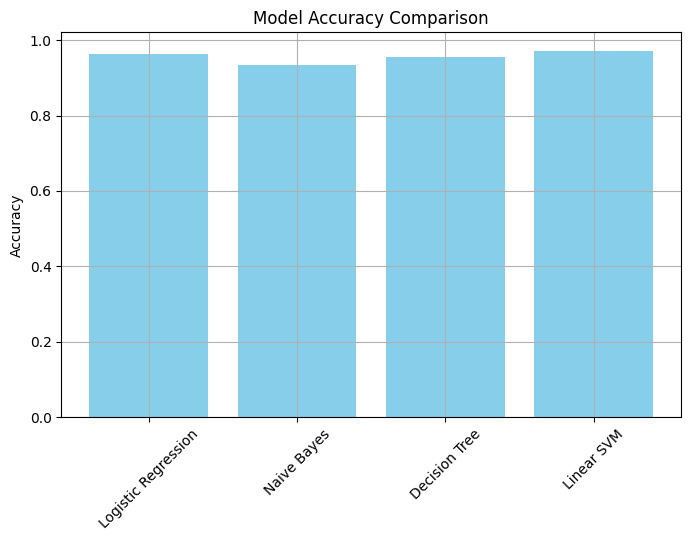

In [58]:

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Confusion Matrix



Best model name is LinearSVC()


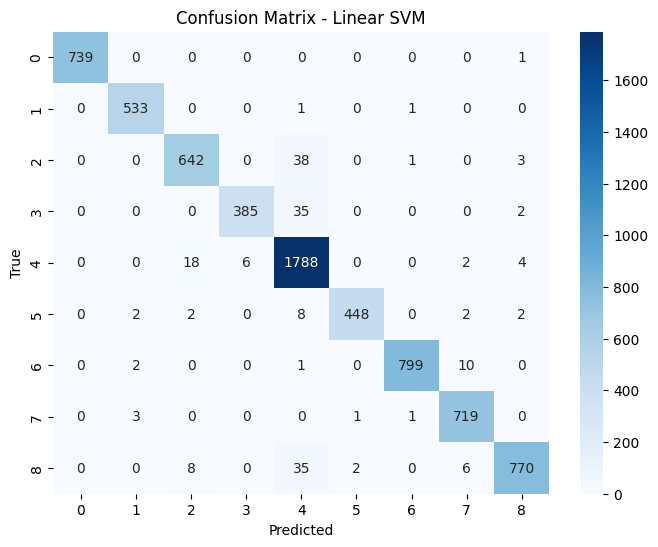

In [59]:
# Choose the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best model name is {best_model}")

# Predictions
y_pred = best_model.predict(X_test_tfidf)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Conclusions

- The best performing model was selected based on accuracy.  
- Logistic Regression or Linear SVM usually perform best on text classification.  
- Further improvements could include hyperparameter tuning and deep learning models.
